In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
employee_ids = [f"EMP_{str(i).zfill(3)}" for i in range(1, 31)]
dates = pd.date_range(start="2025-07-01", periods=30,freq="D")

In [21]:
employee_ids

['EMP_001',
 'EMP_002',
 'EMP_003',
 'EMP_004',
 'EMP_005',
 'EMP_006',
 'EMP_007',
 'EMP_008',
 'EMP_009',
 'EMP_010',
 'EMP_011',
 'EMP_012',
 'EMP_013',
 'EMP_014',
 'EMP_015',
 'EMP_016',
 'EMP_017',
 'EMP_018',
 'EMP_019',
 'EMP_020',
 'EMP_021',
 'EMP_022',
 'EMP_023',
 'EMP_024',
 'EMP_025',
 'EMP_026',
 'EMP_027',
 'EMP_028',
 'EMP_029',
 'EMP_030']

In [26]:
data ={ 
        "Date":np.tile(dates,len(employee_ids)),
        "Employee_ID":np.repeat(employee_ids,len(dates)),
        "Working_Hours":np.random.uniform(4,10,size=len(dates)*len(employee_ids)).round(2)
}

df = pd.DataFrame(data)

In [27]:
df

,Date,Employee_ID,Working_Hours
0,2025-07-01,EMP_001,7.70
1,2025-07-02,EMP_001,5.25
2,2025-07-03,EMP_001,4.34
3,2025-07-04,EMP_001,9.74
4,2025-07-05,EMP_001,7.42
...,...,...,...
895,2025-07-26,EMP_030,7.67
896,2025-07-27,EMP_030,5.17
897,2025-07-28,EMP_030,6.09
898,2025-07-29,EMP_030,8.20


In [28]:
df.to_csv("employee_working _hours.csv",index=False)

In [29]:
df_csv = pd.read_csv("employee_working _hours.csv")

In [30]:
print(df_csv.head())
print(df_csv.describe())
print(df_csv["Employee_ID"].nunique())

         Date Employee_ID  Working_Hours
0  2025-07-01     EMP_001           7.70
1  2025-07-02     EMP_001           5.25
2  2025-07-03     EMP_001           4.34
3  2025-07-04     EMP_001           9.74
4  2025-07-05     EMP_001           7.42
       Working_Hours
count     900.000000
mean        6.999567
std         1.736998
min         4.000000
25%         5.457500
50%         6.945000
75%         8.470000
max        10.000000
30


In [31]:
df.isnull().sum()

Date             0
Employee_ID      0
Working_Hours    0
dtype: int64

In [32]:
print(df.dtypes)

Date             datetime64[ns]
Employee_ID              object
Working_Hours           float64
dtype: object


In [34]:
total_hours = df.groupby("Employee_ID")["Working_Hours"].sum().sort_values(ascending = False)
print(total_hours )

Employee_ID
EMP_003    230.61
EMP_020    227.58
EMP_015    226.78
EMP_019    222.85
EMP_005    219.54
EMP_022    219.30
EMP_025    218.93
EMP_008    217.76
EMP_021    216.84
EMP_009    213.68
EMP_014    211.19
EMP_002    210.53
EMP_013    209.96
EMP_030    209.93
EMP_023    209.58
EMP_024    209.30
EMP_012    209.19
EMP_007    209.17
EMP_006    208.46
EMP_017    207.90
EMP_028    205.67
EMP_010    205.58
EMP_029    203.69
EMP_026    200.50
EMP_016    199.66
EMP_001    199.55
EMP_018    197.74
EMP_011    194.50
EMP_004    192.74
EMP_027    190.90
Name: Working_Hours, dtype: float64


In [35]:
threshold_low = 5
threshold_high = 9
df_csv["low_hour_flag"] = df_csv["Working_Hours"] < threshold_low
df_csv["high_hour_flag"] = df_csv["Working_Hours"] > threshold_high

print(df_csv[df_csv["low_hour_flag"] | df_csv["high_hour_flag"]].head())

          Date Employee_ID  Working_Hours  low_hour_flag  high_hour_flag
2   2025-07-03     EMP_001           4.34           True           False
3   2025-07-04     EMP_001           9.74          False            True
13  2025-07-14     EMP_001           4.25           True           False
16  2025-07-17     EMP_001           4.93           True           False
18  2025-07-19     EMP_001           4.22           True           False


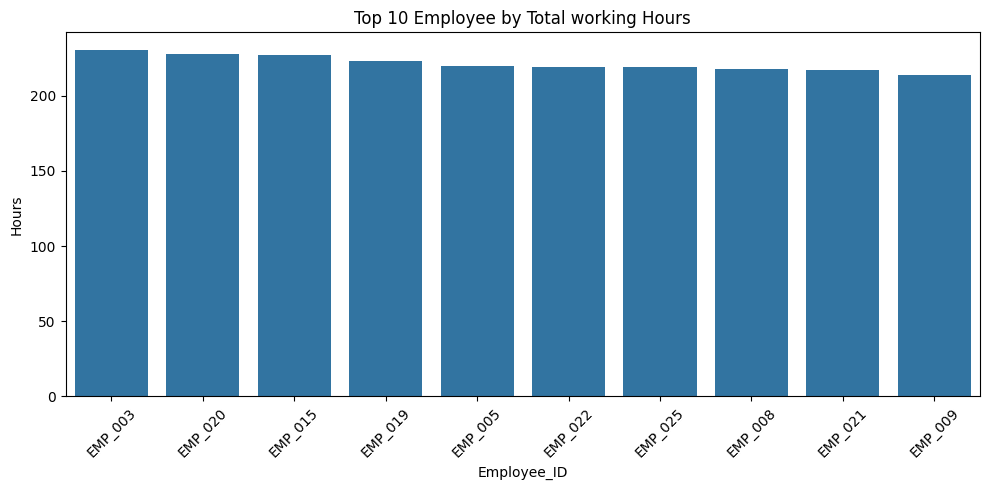

In [36]:
top10 = total_hours.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index, y=top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 Employee by Total working Hours")
plt.ylabel("Hours")
plt.tight_layout()
plt.show()

In [44]:
Grades = df.loc[(df["Employee_ID"]=="EMP_003")]

In [45]:
Grades.head()

,Date,Employee_ID,Working_Hours
60,2025-07-01,EMP_003,8.19
61,2025-07-02,EMP_003,7.16
62,2025-07-03,EMP_003,9.95
63,2025-07-04,EMP_003,6.91
64,2025-07-05,EMP_003,7.32


In [42]:
import requests
from bs4 import BeautifulSoup
url = "https://books.toscrape.com/"
response = requests.get(url)

In [43]:
soup = BeautifulSoup(response.content, "html.parser")
books = soup.find_all("article", class_="product_pod")
for book in books:
    title = book.h3.a["title"]
    price = book.find("p", class_="price_color").text
    print(f"Title: {title} | Price: {price}")

Title: A Light in the Attic | Price: £51.77
Title: Tipping the Velvet | Price: £53.74
Title: Soumission | Price: £50.10
Title: Sharp Objects | Price: £47.82
Title: Sapiens: A Brief History of Humankind | Price: £54.23
Title: The Requiem Red | Price: £22.65
Title: The Dirty Little Secrets of Getting Your Dream Job | Price: £33.34
Title: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull | Price: £17.93
Title: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics | Price: £22.60
Title: The Black Maria | Price: £52.15
Title: Starving Hearts (Triangular Trade Trilogy, #1) | Price: £13.99
Title: Shakespeare's Sonnets | Price: £20.66
Title: Set Me Free | Price: £17.46
Title: Scott Pilgrim's Precious Little Life (Scott Pilgrim #1) | Price: £52.29
Title: Rip it Up and Start Again | Price: £35.02
Title: Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991 | Price: £57.25
Title: Olio | Pri